<a href="https://colab.research.google.com/github/htharshht/The-Sparks-Foundation-Tasks/blob/main/TASK_1__Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **The Sparks Foundation**

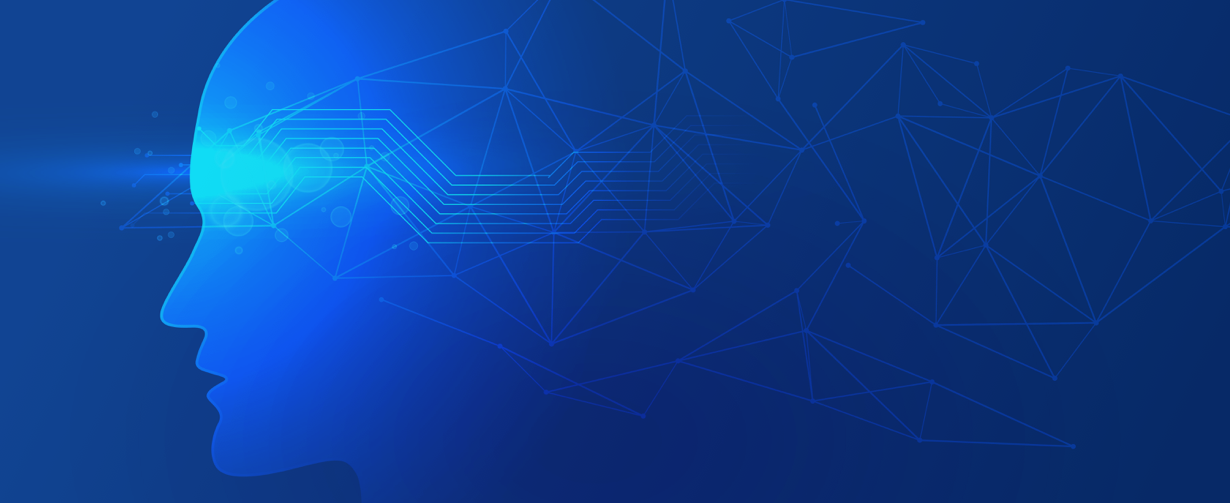

**Author :** Harshit Tiwari

Github Link : 

## **Problem Statement** : To Predict the percentage of marks of the students based on the number of hours they studied

In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
import warnings

In [ ]:
# Importing the dataset
link = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(link)

In [ ]:
# Top five rows of our dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# Bottom five rows of our dataset
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
# number of rows and columns in our dataset
data.shape

(25, 2)

In [ ]:
# columns name of our dataset
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
# data type of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# some important description of our dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Checking null values

In [ ]:
null_values_in_data=data.isnull().sum().sort_values(ascending=False)
print(null_values_in_data)

Hours     0
Scores    0
dtype: int64


There is no any null values in our dataset

# Checking Duplicate values

In [ ]:
# Check there is any duplicate row
len(data[data.duplicated()])

0

There is no any duplicate row in our dataset                                                                                                                                                                                                                                                                                         

.

## Data Visualization

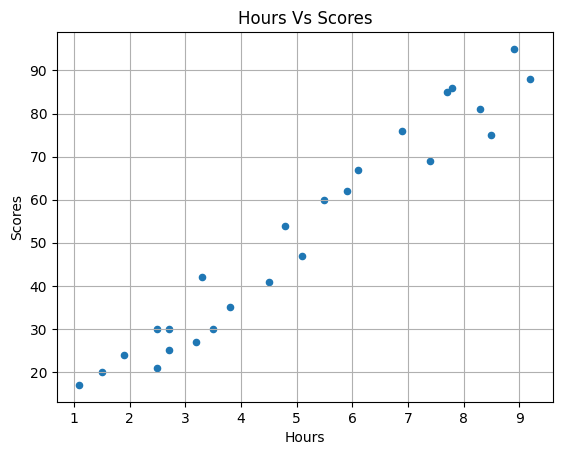

In [ ]:
# Plot a scatter plot between Hour and Scores
data.plot(kind='scatter',x='Hours',y='Scores')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours Vs Scores")
plt.grid()
plt.show()

This graph shows there is linear relationship between Hours and Scores

.

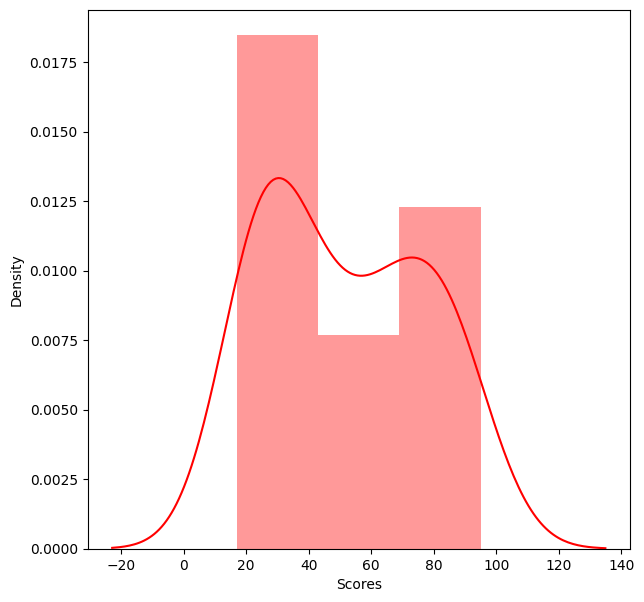

In [ ]:
# Check distribution of our Dependent variable
warnings.filterwarnings('ignore')
plt.figure(figsize=(7,7))
sns.distplot(data['Scores'],color="r");

Here we can see our dependent variable is normal distributed 

.

In [ ]:
# Let's see the correlation between the columns
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


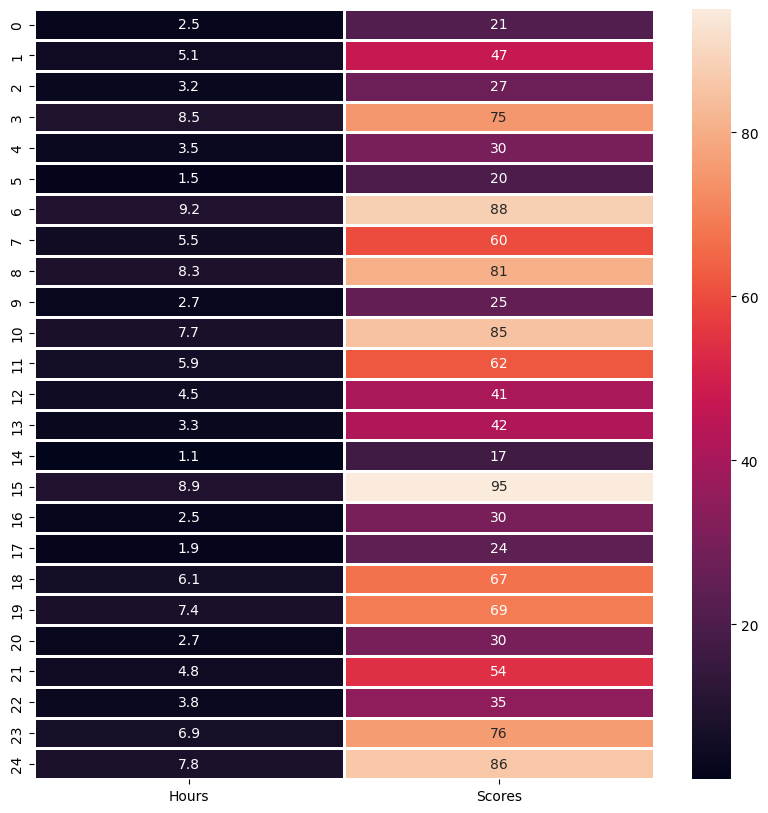

In [ ]:
# Plot the heatmap
plt.figure(figsize=(10,10))
heat_map = sns.heatmap( data, linewidth = 1 , annot = True)
plt.show()

## **Finding outlier** 

Text(0.5, 1.0, 'BOX PLOT')

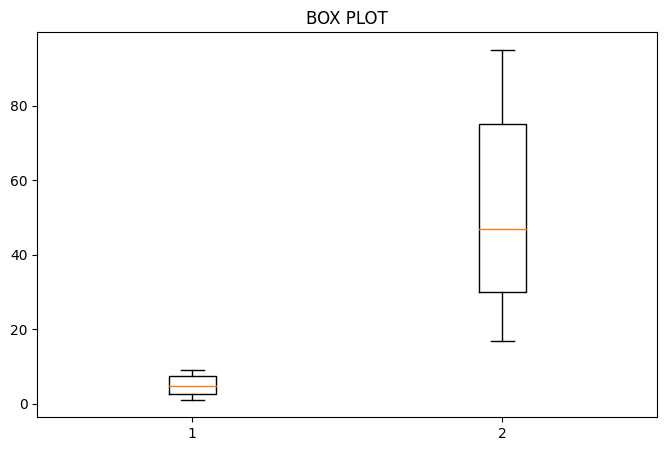

In [ ]:
# Finding outlier
plt.figure(figsize=(8,5))
plt.boxplot(data)
plt.title("BOX PLOT")

## **Splitting the data**

In [ ]:
# Here Hours is independent variable 
independent_variable="Hours"

In [ ]:
# Here "Scores" is dependent variable
dependent_variable="Scores"


In [ ]:
x=data[[independent_variable]].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y=data[[dependent_variable]].values
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [ ]:
# split our dataset in 80 percent for train and 20 percent for test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

## **Create the linear regression object**

In [ ]:
lr = LinearRegression()
lr

LinearRegression()

## **Train the Model**

In [ ]:
# Now train our model by x_train and x_test
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
# coefficient after train our modal
lr.coef_

array([[9.91065648]])

In [ ]:
# Intercept after train our modal
lr.intercept_

array([2.01816004])

## **Making Predictions**

In [ ]:
# let's make our predictions by using x_test
y_pred=lr.predict(x_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [ ]:
df_predict = pd.DataFrame({"Hours": x_test.reshape(1,-1)[0] , "Actual Score" : y_test.reshape(1,-1)[0] , "Predicted Score" : y_pred.reshape(1,-1)[0]})
df_predict

,Hours,Actual Score,Predicted Score
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


## **Visualising Test Data**

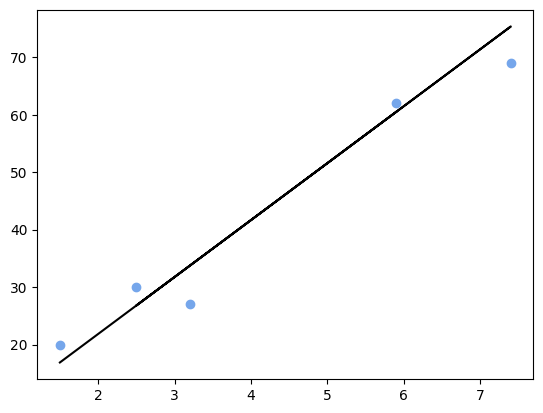

In [ ]:
plt.scatter(x_test,y_test , color = "#75a6eb")
plt.plot(x_test,y_pred , color = "black")
plt.show()

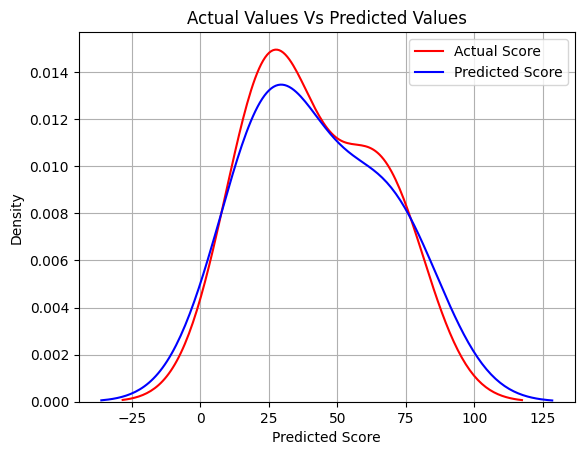

In [ ]:
# Plot between Actual Values Vs Predicted Values
title = "Actual Values Vs Predicted Values"
ax1 = sns.distplot(df_predict["Actual Score"], hist = False , color = "red" , label = "Actual Score")
sns.distplot(df_predict["Predicted Score"] , hist = False , color = "blue" , label = "Predicted Score" , ax = ax1)
plt.legend()
plt.grid()
plt.title(title)
plt.show()

## **Accuracy of our modal**

In [ ]:
mean_absolute_error=metrics.mean_absolute_error(y_test,y_pred)
print('Mean absolute error:',mean_absolute_error)

corr=r2_score(y_train,lr.predict(x_train))
print('correlation:',corr)

r2=r2_score(y_test,y_pred)
print('r2:',r2)

Mean absolute error: 4.183859899002982
correlation: 0.9515510725211552
r2: 0.9454906892105354


Here we can see r2 score which is 0.945. which is good accuracy score so we can deploy this modal for prediction

.

## **Making Predictions**


To Predict - What will be predicted score if a student studies for 9.25 hrs/ day?

In [ ]:
hrs = 9.25
pred = lr.predict([[9.25]])
print("The predicted score if a student studies for 9.25 hrs/ day is",pred[0])

The predicted score if a student studies for 9.25 hrs/ day is [93.69173249]
